In [1]:
#pip install mysql-connector-python

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cnx = mysql.connector.connect(user='root', password='123499', host='127.0.0.1')

mycur = cnx.cursor()

In [4]:
mycur.execute("SHOW DATABASES")
for i in mycur:
    print(i)

('DMA_Project',)
('information_schema',)
('mysql',)
('performance_schema',)
('pro',)
('sys',)
('temp',)
('TEST',)


In [5]:
mycur.execute("USE DMA_Project")

# Execute SQL query to fetch data from the table
mycur.execute("SHOW TABLES")
for i in mycur:
    print(i)

('Act',)
('Actor',)
('Agency',)
('Album',)
('AlbumProduction',)
('Award',)
('Company',)
('Concert',)
('Endorse',)
('Movie',)
('MovieProduction',)
('OrganizeConcert',)
('Production',)
('Recipient',)
('Singer',)
('Stats',)
('Talent',)


In [6]:
query = """\
SELECT a.Name, YEAR(c.Date) AS Year, AVG(s.Revenue) AS AvgRevenuePerConcert \
FROM Concert c \
JOIN OrganizeConcert oc ON c.ConcertID = oc.ConcertID \
JOIN Agency a ON oc.AgencyID = a.AgencyID \
JOIN Stats s ON c.StatsID = s.StatsID \
GROUP BY a.Name, YEAR(c.Date) \
ORDER BY AvgRevenuePerConcert DESC;\
"""

# Execute the query
mycur.execute(query)

# Fetching all rows from the query
rows = mycur.fetchall()
# Identifying column names
columns = [i[0] for i in mycur.description]

df = pd.DataFrame(rows, columns=columns)
df

,Name,Year,AvgRevenuePerConcert
0,Jast-Strosin,2019,286630715.540000
1,Jast-Strosin,2021,275265811.880000
2,Wisoky LLC,2021,270321732.090000
3,Jast-Strosin,2020,265354525.000000
4,Jones-Rohan,2021,255158202.890000
5,Russel PLC,2019,251573364.880000
6,Wisoky LLC,2019,243165518.490000
7,"Reichel, Flatley and Marvin",2022,231311733.410000
8,Gaylord-Block,2021,219805558.240000
9,Jones-Rohan,2023,217095913.860000


In [7]:
plot1 = df.pivot_table(values='AvgRevenuePerConcert', index='Name', columns='Year', fill_value=0)

<Figure size 400x200 with 0 Axes>

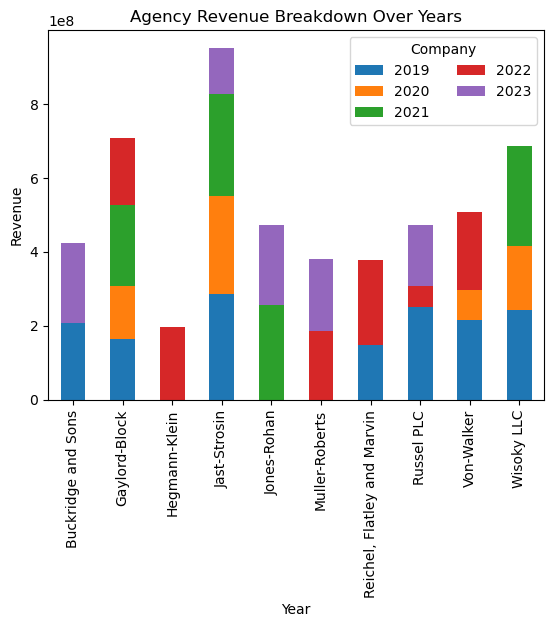

In [8]:
plt.figure(figsize=(4, 2))
plot1.plot(kind='bar', stacked=True)

plt.title('Agency Revenue Breakdown Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.legend(title='Company', loc='upper right', ncol=2)
plt.xticks(rotation=90)
plt.show()

In [9]:
query = """\
SELECT Sector, AVG(fee) AS averageFee \
FROM Endorse \
GROUP BY sector;\
"""

# Execute the query
mycur.execute(query)

# Fetching all rows from the query
rows = mycur.fetchall()
# Identifying column names
columns = [i[0] for i in mycur.description]

df2 = pd.DataFrame(rows, columns=columns)
df2

,Sector,averageFee
0,Sport,20444302.000000
1,Electronic Appliance,15516655.000000
2,Fashion,18868976.166667
3,Hardware,32079467.500000
4,Food,30713368.444444


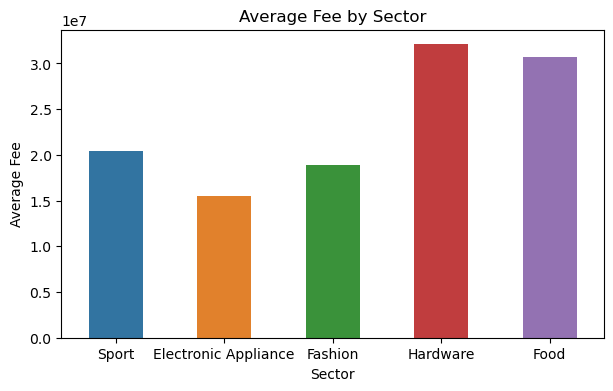

In [10]:
plt.figure(figsize=(7, 4))
sns.barplot(df2, x='Sector', y='averageFee', width=0.5)

plt.title('Average Fee by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Fee')

plt.show()

In [11]:
query = """\
SELECT oc.AgencyID, a.Name, COUNT(oc.ConcertID) AS ConcertCount \
FROM OrganizeConcert oc \
JOIN Concert c ON oc.ConcertID = c.ConcertID \
JOIN Agency a ON oc.AgencyID = a.AgencyID \
WHERE YEAR(c.Date) = YEAR(CURRENT_DATE - INTERVAL 1 YEAR) \
GROUP BY oc.AgencyID, a.Name \
ORDER BY ConcertCount DESC;\
"""

# Execute the query
mycur.execute(query)

# Fetching all rows from the query
rows = mycur.fetchall()
# Identifying column names
columns = [i[0] for i in mycur.description]

df3 = pd.DataFrame(rows, columns=columns)
df3

,AgencyID,Name,ConcertCount
0,10,Jast-Strosin,3
1,4,Jones-Rohan,1
2,5,Buckridge and Sons,1
3,6,Muller-Roberts,1
4,9,Russel PLC,1


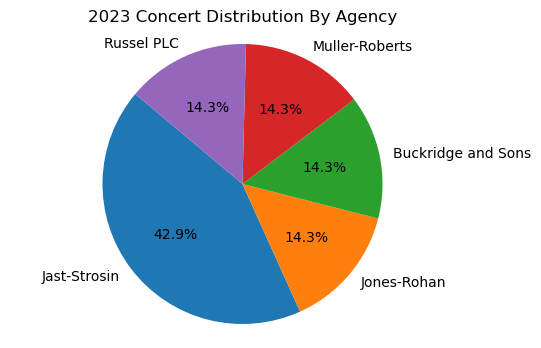

In [12]:
plt.figure(figsize=(6, 4))
plt.pie(df3['ConcertCount'], labels=df3['Name'], autopct='%1.1f%%', startangle=140)
plt.title('2023 Concert Distribution By Agency')
plt.axis('equal')
plt.show()